In [ ]:
# Dataset source: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

First few rows of the dataset:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


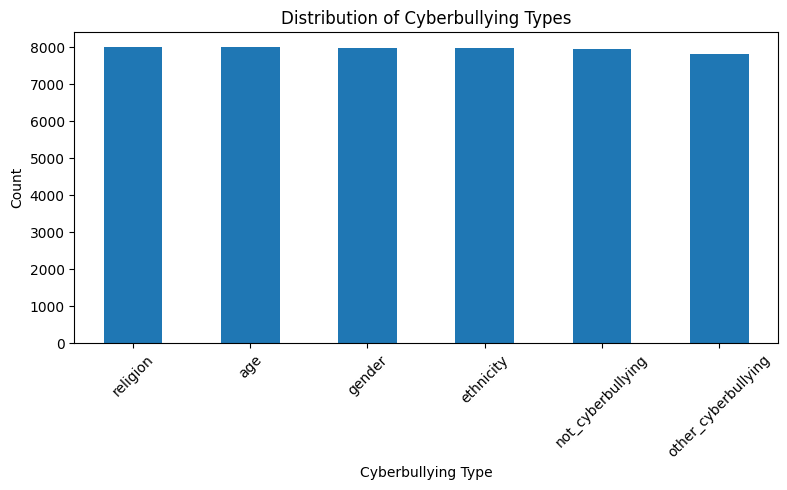

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cyberbullying.csv')

# Display basic info
print("First few rows of the dataset:")
print(df.head())

# Count of each cyberbullying type
counts = df['cyberbullying_type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
counts.plot(kind='bar')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   word_count_range  tweet_count
0              1-10         8431
1             11-20        15474
2             21-30        11227
3             31-40         3968
4             41-50         6090
5             51-60         2439
6             61-70           44
7             71-80            1
8             81-90            0
9            91-100            1
10             100+           17


c:\Users\Chien Shyong\Documents\School Work\Term 8\Artificial Intelligence\artificially-intelligent\venv\Lib\site-packages\matplotlib\axes\_axes.py:7160: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


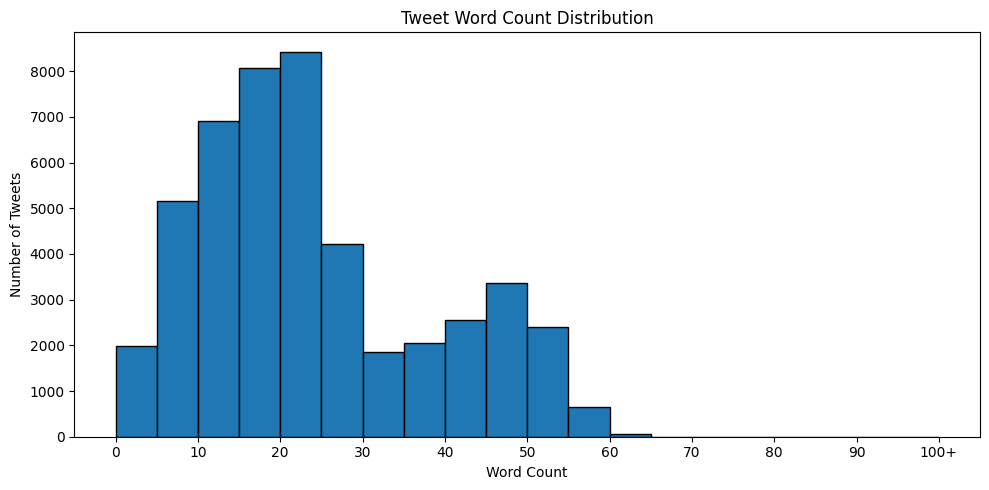

In [17]:
# Word counts

import pandas as pd

# Calculate word count
df['text_length'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Define bins and labels, grouping all lengths > 100 into one bin
bins = list(range(0, 101, 10)) + [float('inf')]  # 0–10, 11–20, ..., 91–100, 100+
labels = [f'{i+1}-{i+10}' for i in range(0, 100, 10)] + ['100+']

# Bin the text lengths
df['length_bin'] = pd.cut(df['text_length'], bins=bins, labels=labels, right=True)

# Generate frequency table
bin_table = df['length_bin'].value_counts().sort_index().reset_index()
bin_table.columns = ['word_count_range', 'tweet_count']

# Display the table
print(bin_table)

# Calculate text length in words
df['text_length'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Cap values at 100+ for binning
df['length_capped'] = df['text_length'].apply(lambda x: x if x < 100 else 100)

# Plot histogram
plt.figure(figsize=(10, 5))
df['length_capped'].plot(kind='hist', bins=list(range(0, 101, 5)) + [float('inf')], edgecolor='black')
plt.title('Tweet Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Number of Tweets')
plt.xticks(list(range(0, 105, 10)), labels=[str(i) for i in range(0, 100, 10)] + ['100+'])
plt.tight_layout()
plt.show()


In [6]:
#TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the CSV
df = pd.read_csv('cyberbullying.csv')  # Replace with your file path
df['tweet_text'] = df['tweet_text'].fillna('')

# Group tweets by cyberbullying type
grouped = df.groupby('cyberbullying_type')['tweet_text'].apply(lambda texts: ' '.join(texts))

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(grouped)

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), 
                        index=vectorizer.get_feature_names_out(), 
                        columns=grouped.index)

# For each label, get top N words by TF-IDF score
top_n = 10
summary = {}

for label in tfidf_df.columns:
    top_words = tfidf_df[label].sort_values(ascending=False).head(top_n)
    summary[label] = list(zip(top_words.index, top_words.values))

# Create a summary table
summary_table = pd.DataFrame.from_dict(summary, orient='index').transpose()
summary_table.columns.name = 'cyberbullying_type'
print(summary_table)


cyberbullying_type                             age  \
0                     (school, 0.6860797985256267)   
1                       (high, 0.4202238765969464)   
2                    (bullied, 0.3629131241960677)   
3                     (bully, 0.22767624083284319)   
4                      (girl, 0.19477409664874162)   
5                     (girls, 0.19394948150628294)   
6                      (like, 0.15313103195457797)   
7                   (bullies, 0.13531934487747035)   
8                      (just, 0.09004797355648851)   
9                    (people, 0.07710151581988714)   

cyberbullying_type                        ethnicity  \
0                      (nigger, 0.5901864568203692)   
1                       (fuck, 0.44263113455458863)   
2                        (dumb, 0.4416992795344737)   
3                    (niggers, 0.20735211499321987)   
4                         (ass, 0.1931481314420023)   
5                   (tayyoung_, 0.1833979809590792)   
6                   

Generating word cloud for label: age


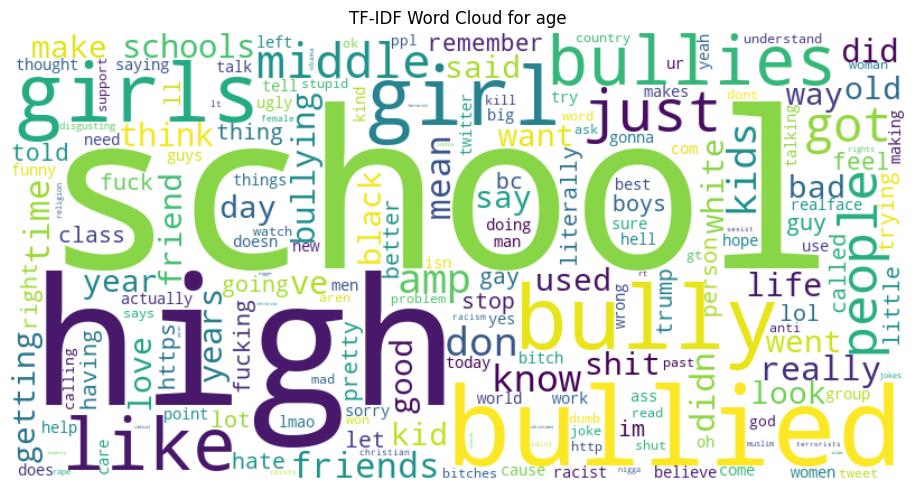

Generating word cloud for label: ethnicity


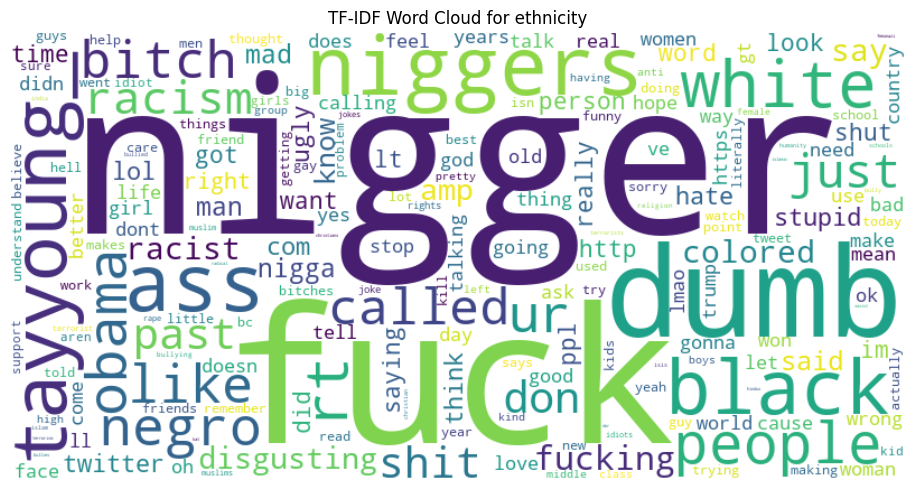

Generating word cloud for label: gender


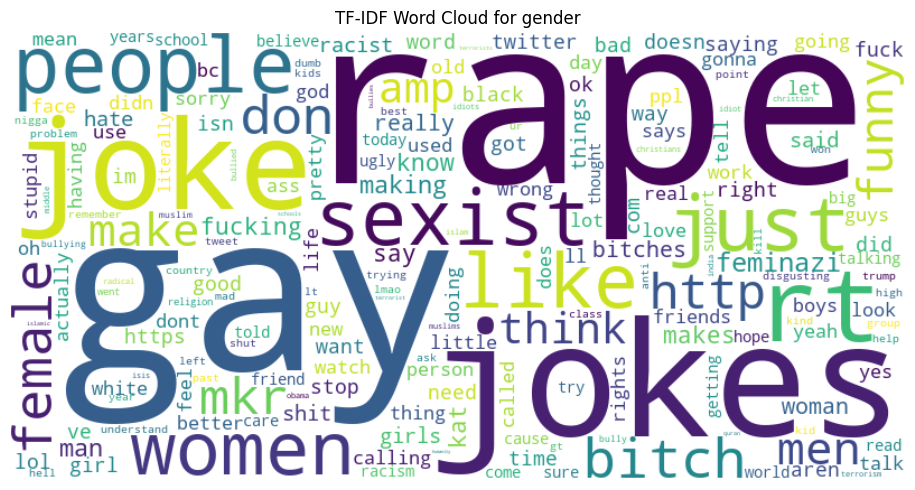

Generating word cloud for label: not_cyberbullying


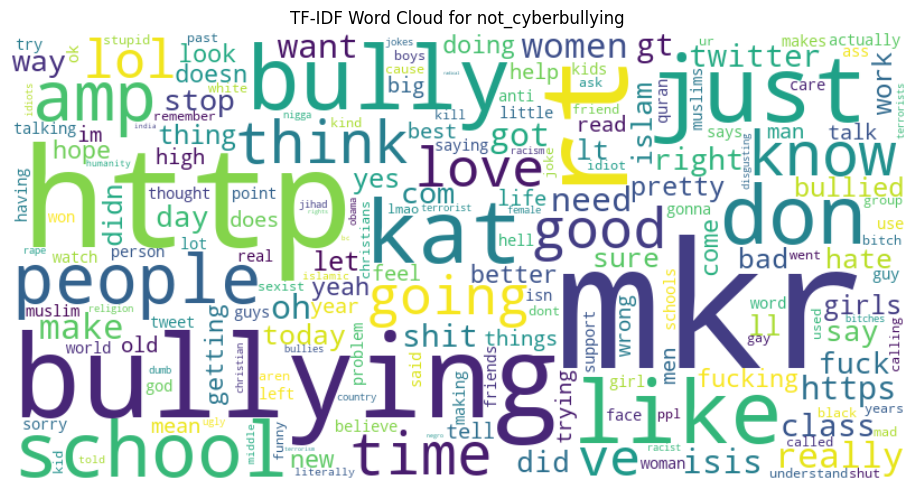

Generating word cloud for label: other_cyberbullying


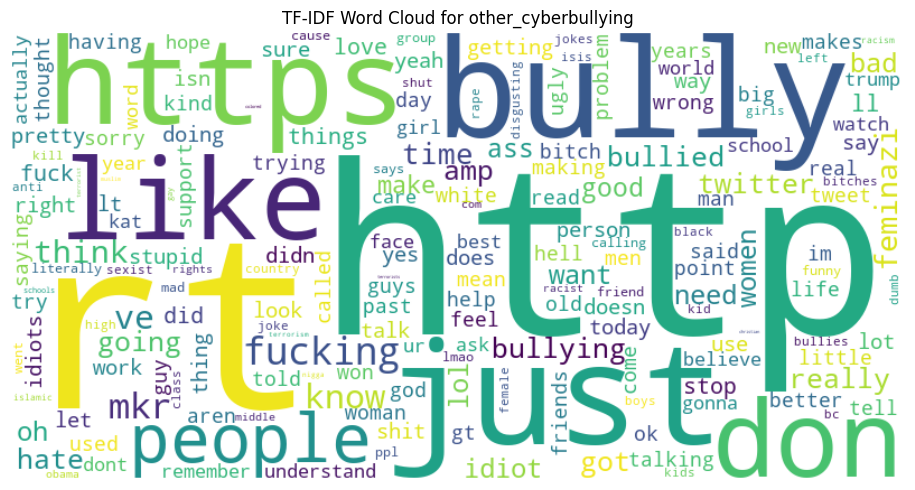

Generating word cloud for label: religion


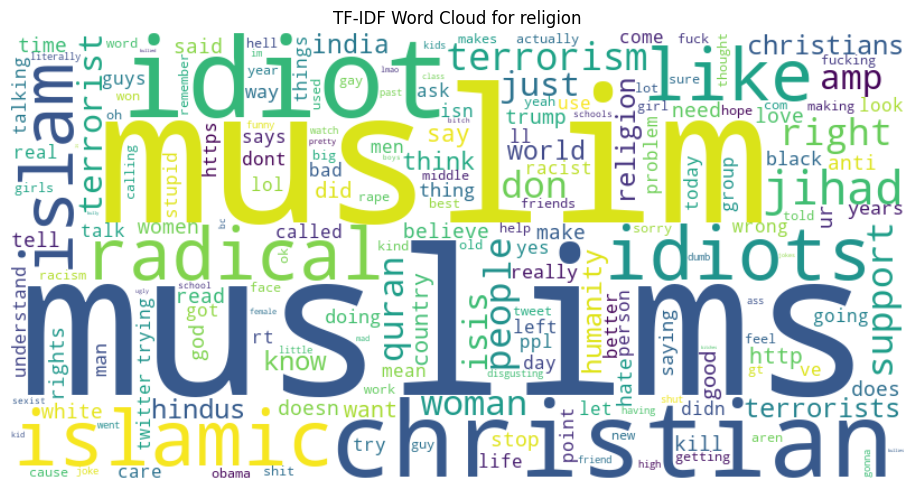

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Load the CSV
df = pd.read_csv('cyberbullying.csv')

# Fill missing text (if any)
df['tweet_text'] = df['tweet_text'].fillna('')

# Group by cyberbullying_type
grouped = df.groupby('cyberbullying_type')['tweet_text'].apply(lambda texts: ' '.join(texts))

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
tfidf_matrix = vectorizer.fit_transform(grouped)

# Convert to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.get_feature_names_out(), columns=grouped.index)

# Plot WordClouds
for label in tfidf_df.columns:
    print(f"Generating word cloud for label: {label}")
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    freqs = tfidf_df[label].to_dict()
    wordcloud.generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'TF-IDF Word Cloud for {label}')
    plt.tight_layout()
    plt.show()
